# Predict Ad click

### In this we will try to indicate whether or not a particular internet user click on an Advertisement based on the features of that user.

### This data set contains the following features:

* 'Daily Time Spent on Site' : consumer time on site in minutes
* 'Age' : cutomer age in years
* 'Area Income' : Avg. Income of geographical area of consumer
* 'Daily Internet Usage' : Avg. minutes a day consumer is on the internet
* 'Ad Topic Line' : Headline of the advertisement
* 'City' : City of consumer
* 'Male' : Whether or not consumer was male
* 'Country' : Country of consumer
* 'Timestamp' : Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad' : 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
df = df.drop(["Male","Ad Topic Line","Timestamp"],axis=1)

In [5]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,Iceland,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Duffystad,Lebanon,1
996,51.30,45,67782.17,134.42,New Darlene,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,South Jessica,Mongolia,1
998,55.55,19,41920.79,187.95,West Steven,Guatemala,0


In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
City                        0
Country                     0
Clicked on Ad               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   City                      1000 non-null   object 
 5   Country                   1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [8]:
df.shape

(1000, 7)

In [9]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Country', 'Clicked on Ad'],
      dtype='object')

In [10]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
City                         object
Country                      object
Clicked on Ad                 int64
dtype: object

In [11]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.00000


In [12]:
df.duplicated().any()

False

In [13]:
df['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [14]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

## check outlier in numeric columns

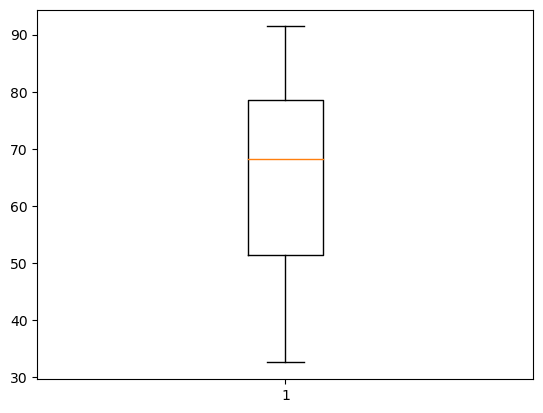

In [15]:

plt.boxplot(df['Daily Time Spent on Site'])
plt.show()

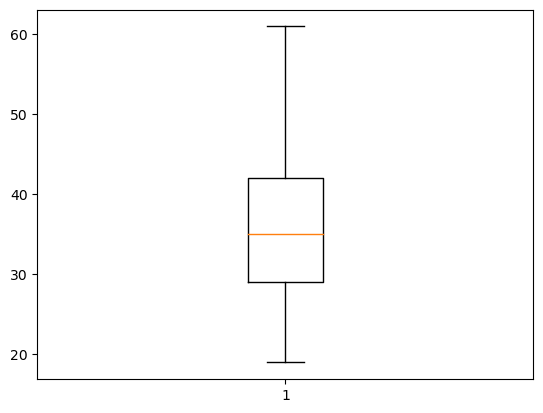

In [16]:
plt.boxplot(df['Age'])
plt.show()

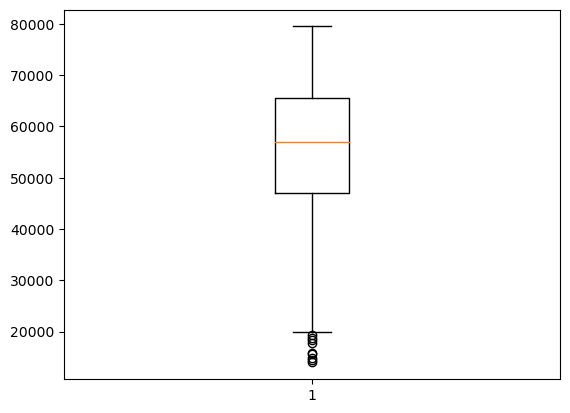

In [17]:
plt.boxplot(df['Area Income'])
plt.show()

In [18]:
def remove_outliers(d,c):
    # where d is the variable for dataframe and c is the variable for column
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate igr(inter quaetile range)
    iqr=q3-q1
    
    # find upper bound (ub) and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    # filter good data (i e eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier

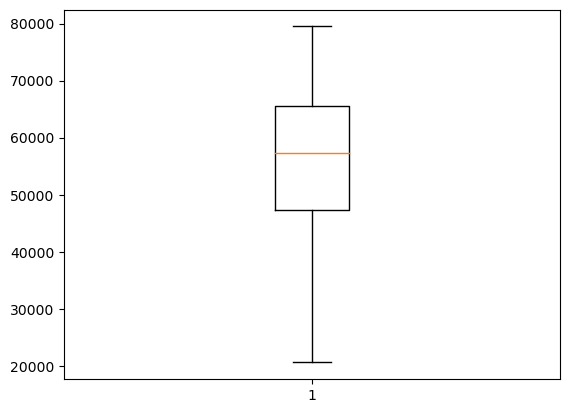

In [46]:
# remove outliers from 'Area Income'
df=remove_outliers(df,'Area Income')

plt.boxplot(df['Area Income'])
plt.show()

In [47]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    490
Name: count, dtype: int64

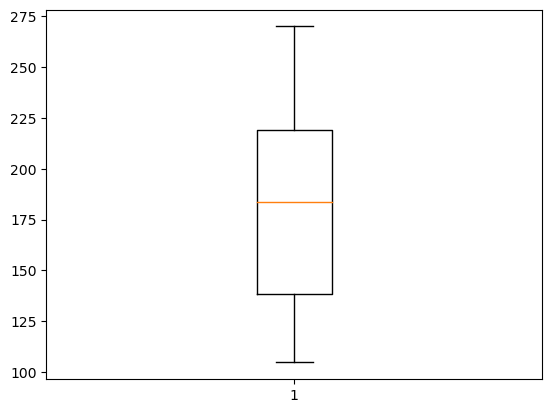

In [48]:
plt.boxplot(df['Daily Internet Usage'])
plt.show()

# checking EDA (Exploratory Data Analysis)

<Axes: xlabel='Clicked on Ad', ylabel='count'>

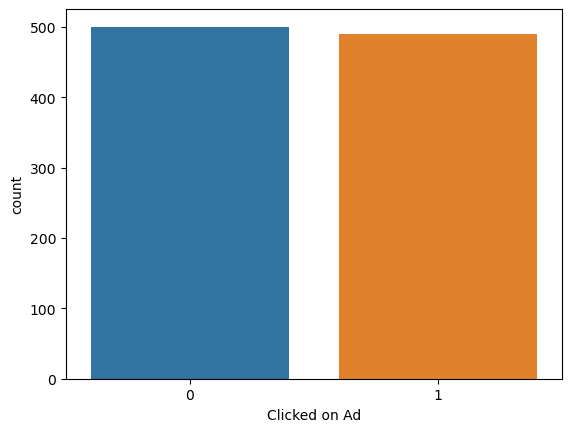

In [49]:
sns.countplot(df, x='Clicked on Ad')

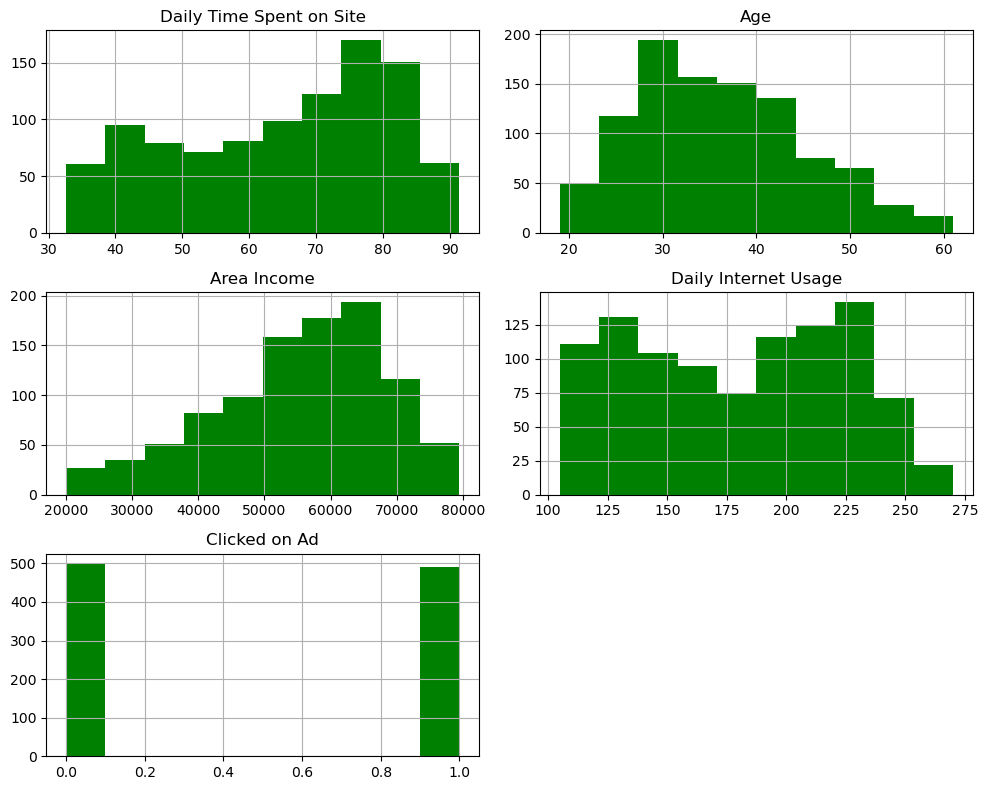

In [23]:
numerical_df = df.select_dtypes(include = 'number')
numerical_df.hist(figsize = (10,8), color = 'g')
plt.tight_layout()
plt.show()

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


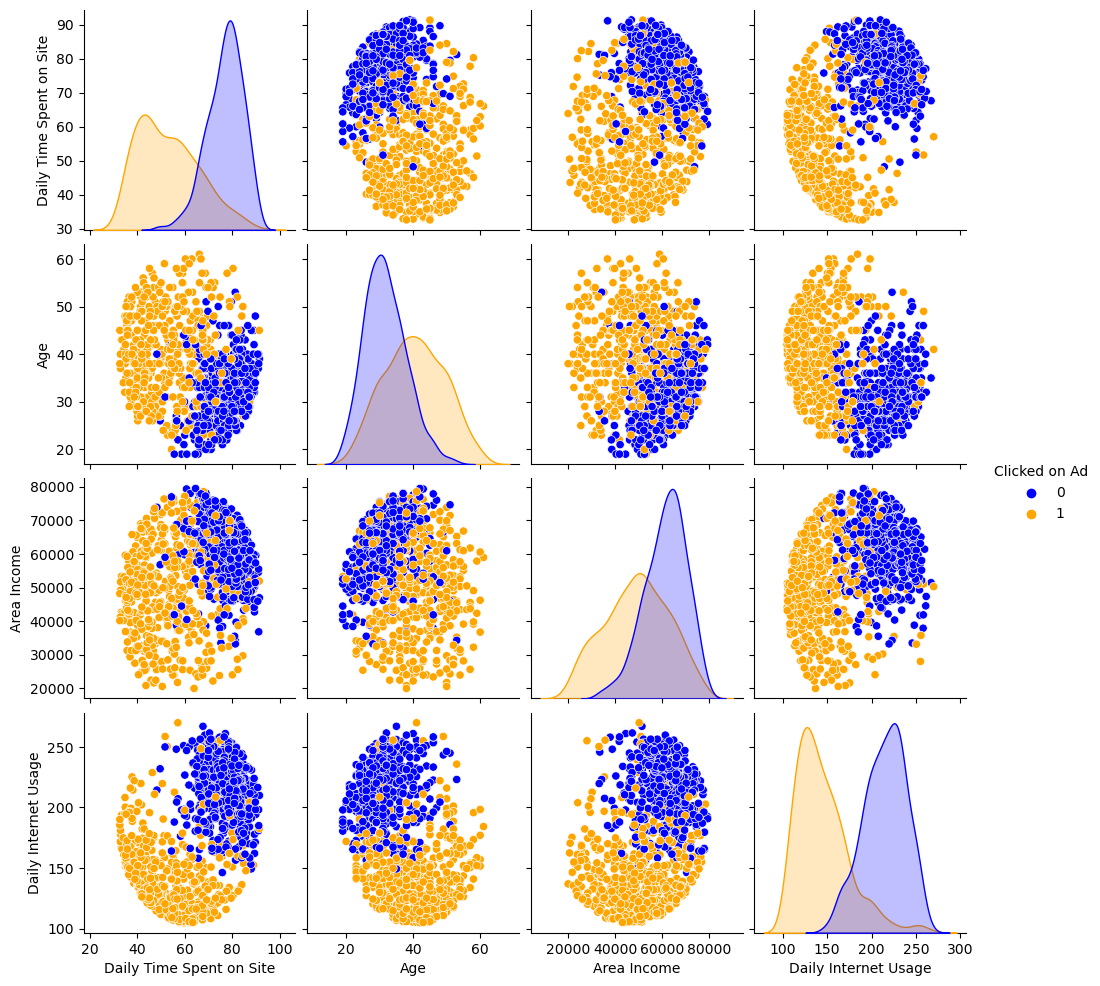

In [24]:
sns.pairplot(numerical_df, hue = 'Clicked on Ad',palette = ['blue','orange'])

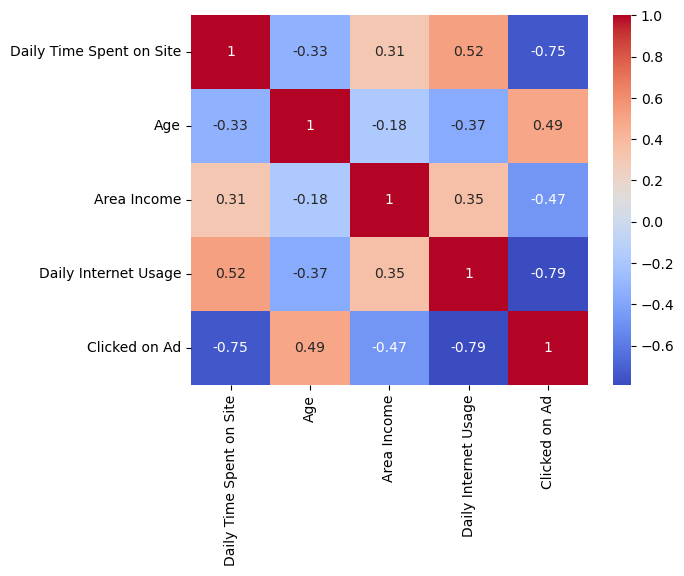

<Figure size 1400x1000 with 0 Axes>

In [25]:
sns.heatmap(numerical_df.corr(), annot = True, cmap='coolwarm')
plt.figure(figsize = (14,10))
plt.show()

# Encoding Categorical Variables

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [51]:
df.dtypes


Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
City                          int32
Country                       int32
Clicked on Ad                 int64
dtype: object

# Data Splitting

In [52]:
from sklearn.model_selection import train_test_split
x = df.drop(['Clicked on Ad'],axis=1)
y = df['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [53]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Country
229,76.06,23,58633.63,201.04,532,31
462,74.88,27,67240.25,175.17,752,199
865,39.53,33,40243.82,142.21,527,40
809,67.51,43,23942.61,127.20,370,233
241,53.68,47,56180.93,115.26,509,137


In [54]:
print(x_train.dtypes)

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
City                          int32
Country                       int32
dtype: object


# Data Normalization

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Modeling

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

import warnings
warnings.filterwarnings('ignore')

In [58]:
classifiers = [
    ('Logistic Regression',LogisticRegression(random_state = 42)),
    ('Naive Bayes',GaussianNB()),
    ('Support Vector Machine',SVC(random_state = 42)),
    ('K-Nearesr Neigbors',KNeighborsClassifier()),
    ('Decision Tree',DecisionTreeClassifier(random_state = 42)),
    ('Random Forest',RandomForestClassifier(random_state = 42)),
    ('AdaBoost',AdaBoostClassifier(random_state = 42)),
    ('Gradient Boosting',GradientBoostingClassifier(random_state = 42)),
    ('Extreme Gradient Boosting',XGBClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 100, subsample = 0.8)),
    ('Multilayer Perceptron',MLPClassifier(early_stopping = True, batch_size = 32,random_state = 0))
]

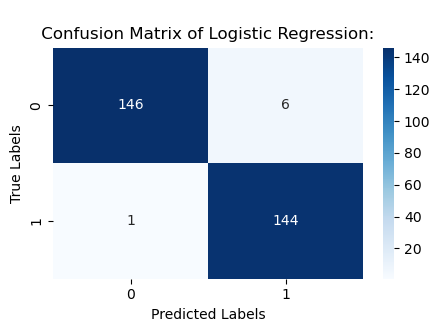

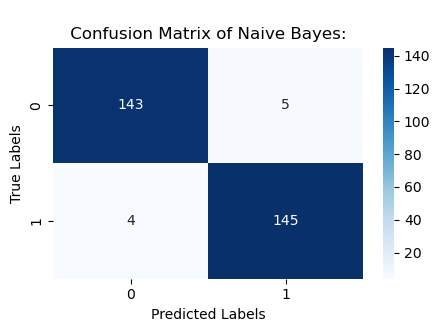

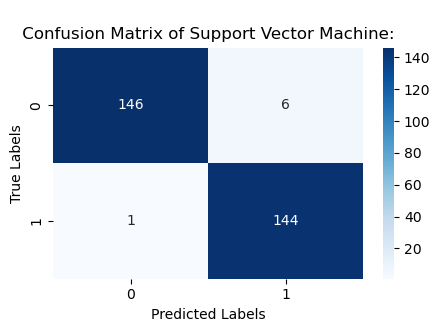

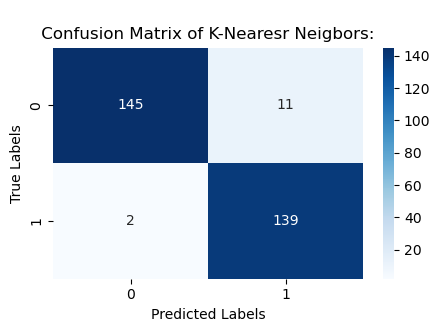

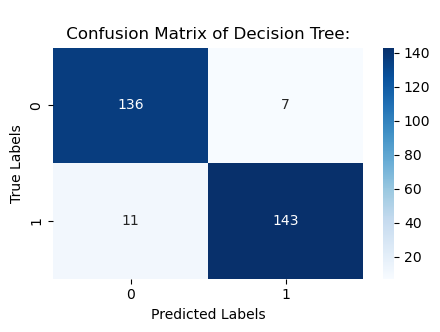

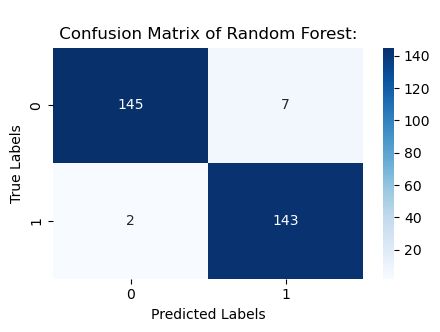

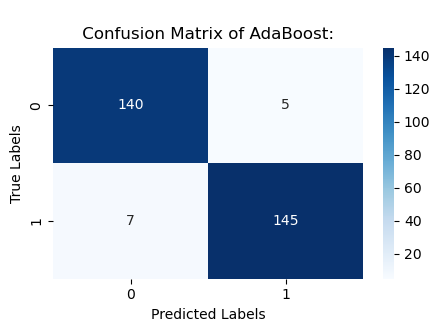

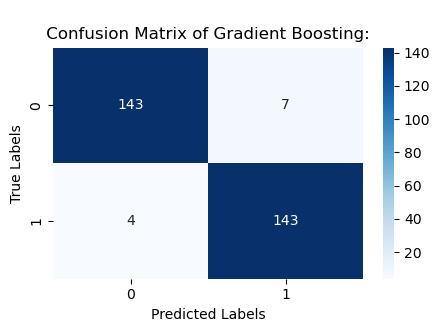

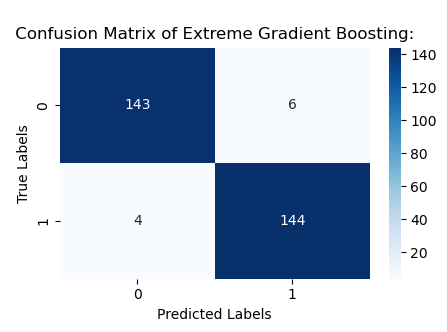

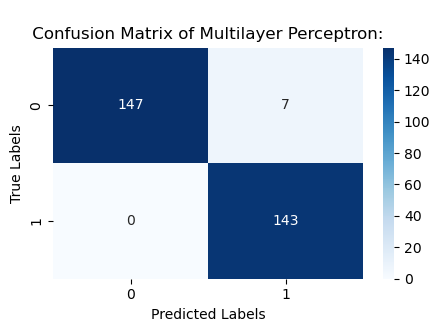

In [59]:
for clfs_name, clfs in classifiers:
    clfs.fit(x_train, y_train)
    y_pred = clfs.predict(x_test)
    
    cf_m = confusion_matrix(y_pred, y_test)
    
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(cf_m, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(f'\n Confusion Matrix of {clfs_name}: ')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [60]:
for clfs_name, clfs in classifiers:
    clfs.fit(x_train, y_train)
    y_pred = clfs.predict(x_test)
    
    class_report=classification_report(y_test,y_pred)
    print(f"Classification Report for {clfs_name} :\n{class_report}")

Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       147
           1       0.99      0.96      0.98       150

    accuracy                           0.98       297
   macro avg       0.98      0.98      0.98       297
weighted avg       0.98      0.98      0.98       297

Classification Report for Naive Bayes :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       147
           1       0.97      0.97      0.97       150

    accuracy                           0.97       297
   macro avg       0.97      0.97      0.97       297
weighted avg       0.97      0.97      0.97       297

Classification Report for Support Vector Machine :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       147
           1       0.99      0.96      0.98       150

    accuracy                           0.98

In [61]:
for clfs_name, clfs in classifiers:
    clfs.fit(x_train, y_train)
    y_pred = clfs.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clfs_name} : Accuracy = {accuracy:0.2f}')

Logistic Regression : Accuracy = 0.98
Naive Bayes : Accuracy = 0.97
Support Vector Machine : Accuracy = 0.98
K-Nearesr Neigbors : Accuracy = 0.96
Decision Tree : Accuracy = 0.94
Random Forest : Accuracy = 0.97
AdaBoost : Accuracy = 0.96
Gradient Boosting : Accuracy = 0.96
Extreme Gradient Boosting : Accuracy = 0.97
Multilayer Perceptron : Accuracy = 0.98


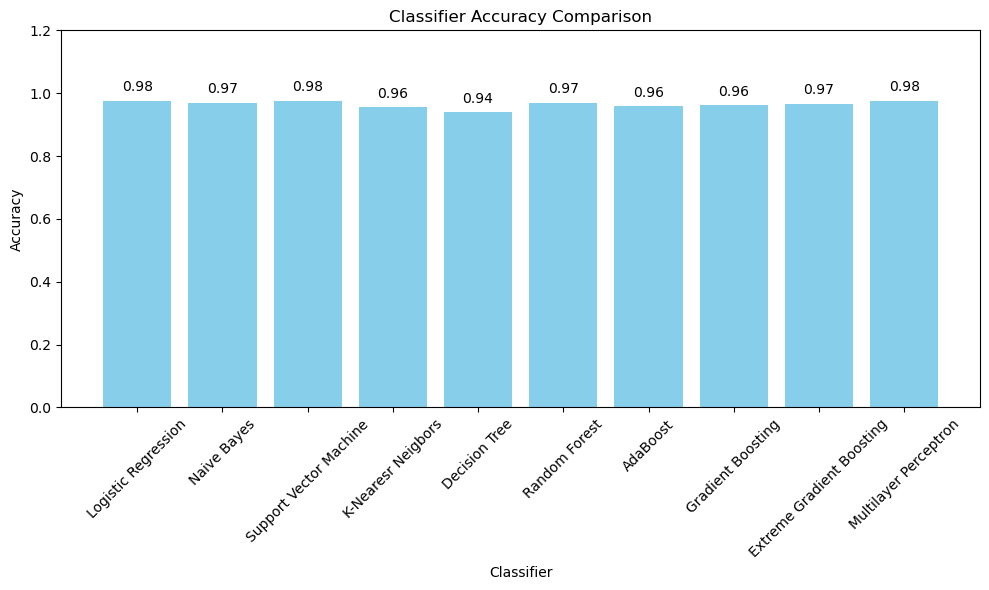

In [62]:
classifier_names = [clfs_name for clfs_name, _ in classifiers]
accuracies = [accuracy_score(y_test, clfs.predict(x_test)) for _,clfs in classifiers]

plt.figure(figsize=(10, 6)) 
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1.2) 

for i, acc in enumerate(accuracies):
    plt.text(i, acc+ 0.02 , f'{acc:.2f}',ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Input ad topic and check whether that ad is clicked or not :

#### The below web link is created by using streamlit community cloud and you can use this link to get into the web , enter the Ad topic which you can get from 'Ad Topic Line' column from dataset and check whether that ad is clicked or not, also you will see all other related details.

In [ ]:
# https://ad-click-predict.streamlit.app/

###  OR  

#### You can check here itself by providing input in the below code and can check whether ad is clicked or not ,also you will see all other related details.

In [63]:
df1 = pd.read_csv('advertising.csv')
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [64]:
def retrieve_ad_info(Ad_Topic_Line):
    try:
        ad_row = df1.loc[df1['Ad Topic Line'] == Ad_Topic_Line].iloc[0]  
        relevant_info = {
            'Clicked on Ad': ad_row['Clicked on Ad'],
            'Daily Time Spent on Site': ad_row['Daily Time Spent on Site'],
            'Age': ad_row['Age'],
            'Daily Internet Usage' : ad_row['Daily Internet Usage'],
            'Male' : ad_row['Male'],
            'City' : ad_row['City'],
            'Country' : ad_row['Country'],
            'Timestamp' : ad_row['Timestamp']
        }
        return relevant_info
    except IndexError:
        return None

input_ad_topic = "Organic bottom-line service-desk" # change the input here
retrieved_info = retrieve_ad_info(input_ad_topic)

if retrieved_info:
    print(f"Ad Topic: {input_ad_topic}")
    print('\n')
    
    print(f"CLICKED ON AD: {'Yes' if retrieved_info['Clicked on Ad'] else 'No'}")
    print('\n')
    
    print("DETAILS : ")
    print(f"Gender: {'Male' if retrieved_info['Male'] else 'Female'}")
    print(f"Age: {retrieved_info['Age']} years")
    print(f"City: {retrieved_info['City']}")
    print(f"Country: {retrieved_info['Country']}")
    print(f"Date & Time: {retrieved_info['Timestamp']}")
    print(f"Daily Time Spent on site: {retrieved_info['Daily Time Spent on Site']} minutes")
    print(f"Daily Internet Usage: {retrieved_info['Daily Internet Usage']} GB")
    
else:
    print(f"Ad topic '{input_ad_topic}' not found in the dataset.")

Ad Topic: Organic bottom-line service-desk


CLICKED ON AD: No


DETAILS : 
Gender: Female
Age: 26 years
City: Davidton
Country: San Marino
Date & Time: 2016-03-13 20:35:42
Daily Time Spent on site: 69.47 minutes
Daily Internet Usage: 236.5 GB


# Saving the Trained Model for deploying in streamlit

In [74]:
import pickle

In [75]:
filename = 'ad_predict.sav'
pickle.dump(classifiers,open(filename,'wb'),protocol=4)  #write binary

In [76]:
# loading the saved model
loaded_model = pickle.load(open('ad_predict.sav','rb')) #red binary

# -------- END -------